# Slow-roll, Rapid-turn inflation models
This notebook contains plotting code only. See the respective python scripts to
generate the data for the models

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams.update({
  "text.usetex": True,
  "text.latex.preamble": "\\usepackage{mathtools}"
})
plt.ioff()

In [2]:
bad = "fuchsia"

#Special colormap for plotting the consistency condition
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)
newcolors = np.vstack((
  bottom(np.linspace(1, 0.25, 128)),
  top(np.linspace(1, 0, 128))
))
cc_cmap = mpl.colors.ListedColormap(newcolors, name='consistency map')
cc_cmap.set_bad(bad)

#special colormap for plotting slow-roll parameters
sr_cmap = mpl.colors.ListedColormap(
  mpl.colormaps['YlGn'](np.linspace(1, 0.25, 256)),
  name='slowroll map'
)
sr_cmap.set_bad(bad)
sr_cmap.set_over(top(0.15))

#delta map
delta_cmap = mpl.colormaps['coolwarm']
delta_cmap.set_bad(bad)

## Angular Inflation

In [194]:
#load data
model='angular'

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

Nx, Ny = consistency.shape
extent = (-1.05, 1.05, -1.05, 1.05)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_107725/3238766833.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


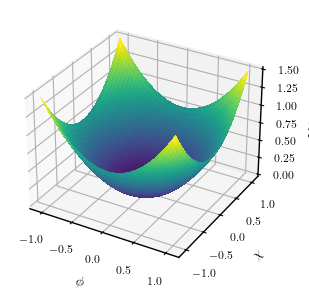

In [189]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')
ax.set_zlabel('$V(\\phi,\\chi)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_107725/2344428409.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


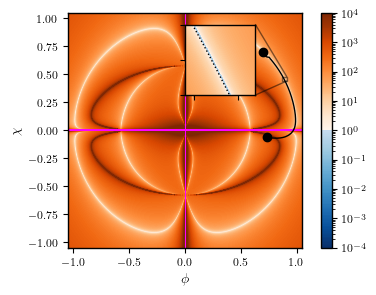

In [199]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio,
  norm = "log",
  origin = 'lower',
  vmin=1e-4,
  vmax=1e4
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}.pdf")

/tmp/ipykernel_107725/1908796926.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


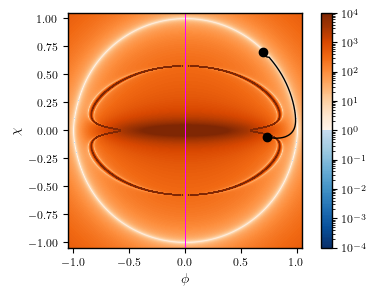

In [94]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.savefig(f"./figs/{model}_old.pdf")
fig.show()

/tmp/ipykernel_107725/351641462.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


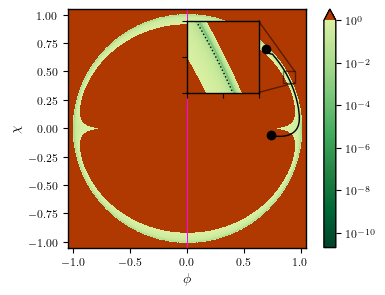

In [200]:
fig, ax = plt.subplots(figsize=(4,3))
plot = ax.imshow(
  np.transpose(np.abs(epsilon_H)),
  extent= extent,
  cmap= sr_cmap,
  origin= 'lower',
  aspect= ratio,
  norm='log',
  vmax=1,
)
cbar = fig.colorbar(plot, extend='max', ticks=[1,1e-2,1e-4,1e-6,1e-8,1e-10])

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.85, 0.95, 0.40, 0.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = sr_cmap,
  aspect = ratio,
  norm = "log",
  origin = 'lower',
  vmax=1
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H.pdf")

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_107725/672359184.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_107725/672359184.py:22: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


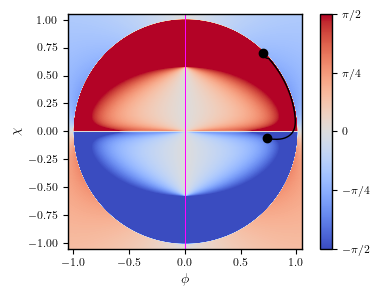

In [115]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= delta_cmap,
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_delta.pdf")
plt.show()

/tmp/ipykernel_107725/92926167.py:51: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


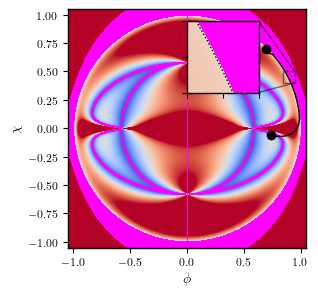

In [201]:
fig, ax = plt.subplots(figsize=(4,3))
plot = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= delta_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=10
)

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.85, 0.95, 0.40, 0.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  norm = "log",
  origin = 'lower',
  vmin=1e-4,
  vmax=1e4
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf")

## EGNO supergravity

In [214]:
#load data
model = "egno"

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

x, y = np.load("./trajectories/egno_r.npy"), np.load("./trajectories/egno_theta.npy")

extent = (0.46, 0.50, 0.0, np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])
Nx, Ny = consistency.shape

/tmp/ipykernel_107725/1388015561.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


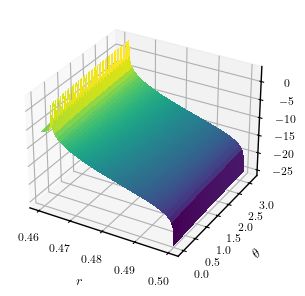

In [203]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
potential = np.transpose(np.log10(np.abs(potential)))
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_107725/3966018522.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


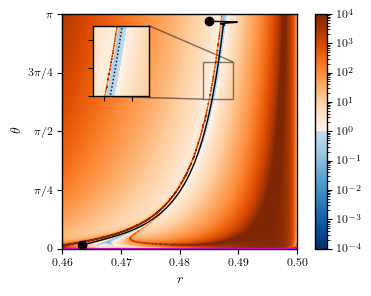

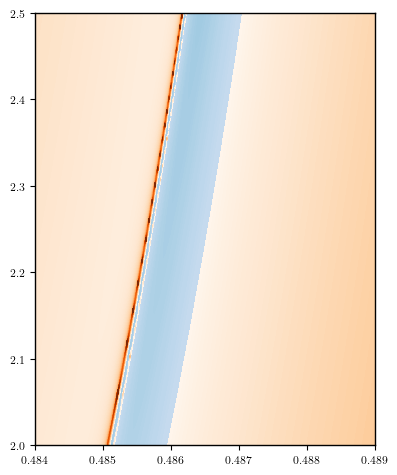

In [213]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  vmin=1e-4,
  vmax=1e4
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}.pdf")

#Bonus figure
plt.figure()
plt.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)
plt.xlim(zoom_extent[0], zoom_extent[1])
plt.ylim(zoom_extent[2], zoom_extent[3])
plt.show()

/tmp/ipykernel_107725/2466983159.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


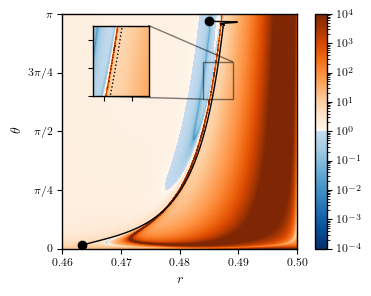

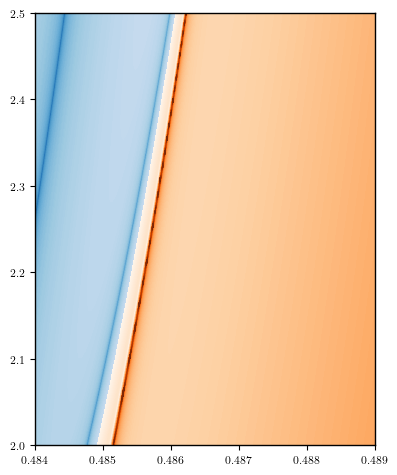

In [205]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  vmin=1e-4,
  vmax=1e4
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_old.pdf")

#Bonus figure
plt.figure()
plt.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)
plt.xlim(zoom_extent[0], zoom_extent[1])
plt.ylim(zoom_extent[2], zoom_extent[3])
plt.show()

/tmp/ipykernel_107725/101910753.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


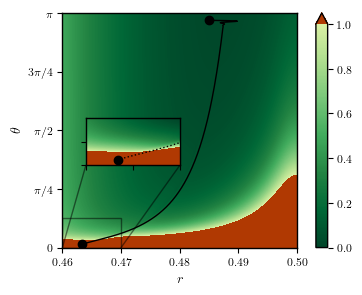

In [206]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.46, 0.47, 0, np.pi/8  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.25, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = sr_cmap,
  origin = 'lower',
  vmax=1
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H.pdf")

/tmp/ipykernel_107725/141853627.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


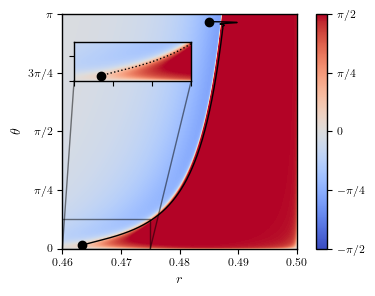

In [207]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=np.pi/2,
  vmin=-np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.46, 0.475, 0, np.pi/8  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = delta[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.5, 0.5],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  origin = 'lower',
  vmax=np.pi/2,
  vmin=-np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])

#save
fig.show()
fig.savefig(f"./figs/{model}_delta.pdf")

/tmp/ipykernel_107725/3537436047.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


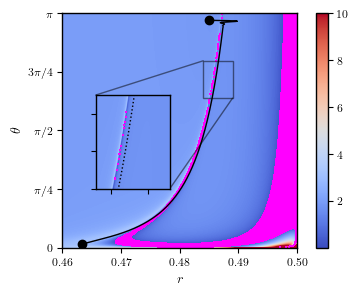

In [215]:
fig, ax = plt.subplots(figsize=(4,3))
image = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= delta_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=10,
  #norm='log'
)

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.25, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  vmax = 10,
  origin = 'lower',
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf")

## D5-brane models

In [22]:
#load data
model = "d5"

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

trajectory = np.loadtxt("./trajectories/d5_trajectory.dat")
x, y = trajectory[:,0], trajectory[:,1]

extent = (0.0, 36.0, 0.0, 4*np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])
Nx, Ny = consistency.shape

/tmp/ipykernel_1273574/112080455.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
/tmp/ipykernel_1273574/112080455.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


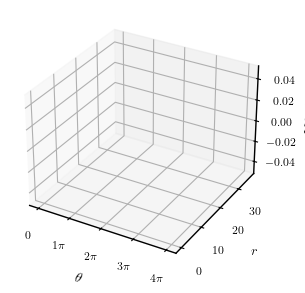

In [7]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
x = np.linspace(extent[2],extent[3],potential.shape[1])
y = np.linspace(extent[0],extent[1],potential.shape[0])
pot = potential#np.log10(np.abs(potential))
surf = ax.plot_surface(*np.meshgrid(x, y), pot, cmap='viridis', antialiased=False)
ax.set_ylabel('$r$')
ax.set_xlabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')
ax.set_xticks(np.pi*np.arange(0, 5), labels=['$0$'] + [f'${n}\\pi$' for n in range(1, 5)])

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_1273574/139469402.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


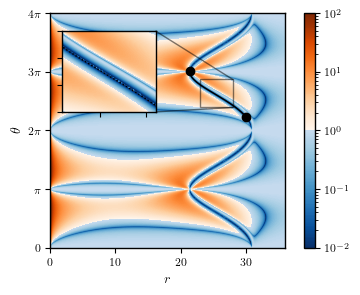

In [27]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-2,
  vmax=1e2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  vmin=1e-2,
  vmax=1e2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}.pdf")

/tmp/ipykernel_1273574/3837427004.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


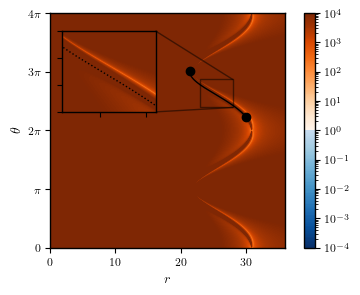

In [29]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmin=1e-4,
  vmax=1e4
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  vmin=1e-4,
  vmax=1e4
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}.pdf")

/tmp/ipykernel_1273574/2592463617.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


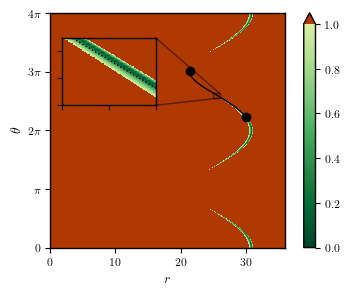

In [37]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.25  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = sr_cmap,
  origin = 'lower',
  vmax=1,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H.pdf")

/tmp/ipykernel_1273574/533586851.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


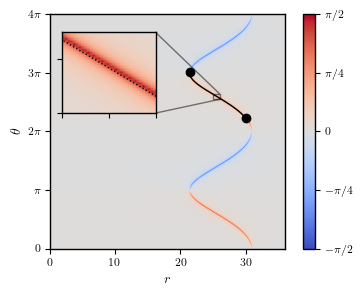

In [40]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmin=-np.pi/2,
  vmax=np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = delta[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  origin = 'lower',
  vmin=-np.pi/2,
  vmax=np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])

#save
fig.show()
fig.savefig(f"./figs/{model}_delta.pdf")

/tmp/ipykernel_1273574/3056029728.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


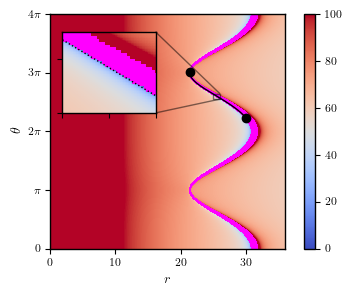

In [49]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(omega),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=100,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  origin = 'lower',
  vmax=100,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
cbar = fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf")